## Linear Regression
### 1. What is Linear Regression?
- Linear Regression is one of the most popular machine learning algorithm. The main idea behind it is to find a relation between two variables so that a line could be visualized between the two by fitting a linear equation of the form: 
    $ \hat y = w^T * x + b $

- This would make it possible for the model to make a prediction. The said prediction would then be the output $ \hat y $ of the forementioned linear equation whereas the input vector would be $ x $.

- Mean squared error (MSE) is usually the performance measure, which is the mean of difference between the prediction $\hat y$ and the ground-truth value $y$ (Which is the actual value) for all $m$ inputs
    $ MSE = {\frac {1} {m}}  {\sum \limits _ {i=1} ^ {m} (y _{i} - \hat y _{i})^2}   $ .

- The algo's purpose would be to find the best suitable $ (w,b) $ to get the most accurate output, which is trying to get MSE to 0. One way to do it would be using this equation that's derived from the MSE equation 
    $ w = (X^{(train)T} X^{(train)})^{−1} X^{(train)T} y^{(train)} $

### 2. How do we implement it?
One might argue that knowing how to implement it isn't that important since we could easily import it from libraries such as sklearn, but I think it's important to understand what's the logic after the model itself, so I'll be trying to do both.

#### But first let's load the data we want to work with
In order to explain it best, I'll be using a dummy dataset.

Here are the features, which weights we will be calculating and that'll be used as an input to our model:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
This is what we're trying to predict using our prementioned features as inputs ['MedHouseVal']


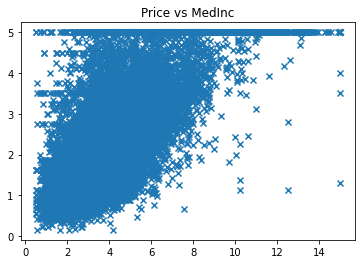

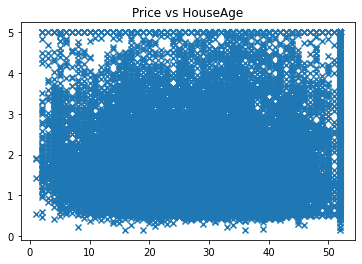

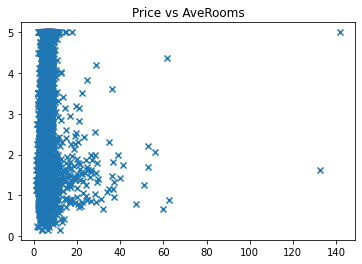

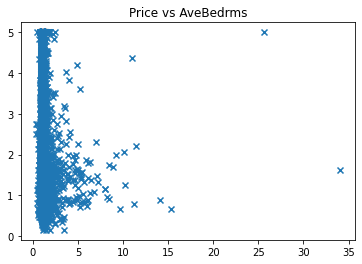

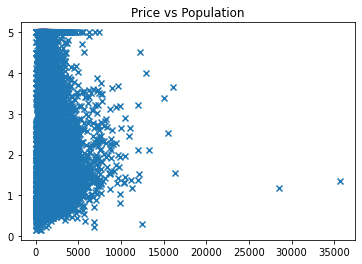

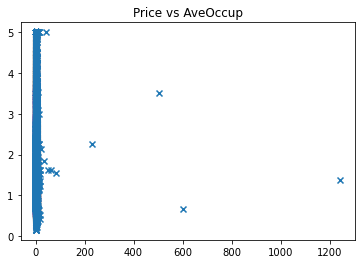

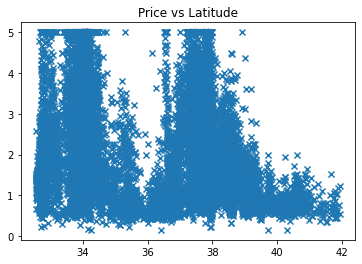

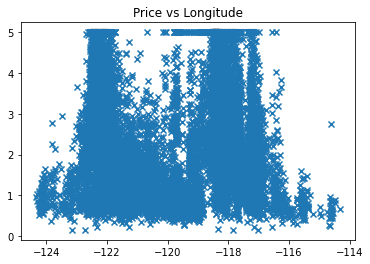

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
%matplotlib inline

california_housing = fetch_california_housing()

print("Here are the features, which weights we will be calculating and that'll be used as an input to our model: "
,california_housing.feature_names)
print("This is what we're trying to predict using our prementioned features as inputs",california_housing.target_names)

#now to define the data we're using for our model Training
X = california_housing.data
y = california_housing.target

#the best way to understand our data would be to visualize them
for i, feature_name in enumerate(california_housing.feature_names):
    plt.figure()
    plt.title(f"Price vs {feature_name}")
    plt.scatter(X[:, i], y, marker="x")
    plt.show()

#### Linear Regression with the help of Sklearn:

learned coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
learned bias: -36.94192020718434
A house with the follwing features:  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] has a price of:  4.526
our model has predicted that a house with the follwing features:  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] has a price of:  4.131649827076757
MSE: 0.5243209861846071


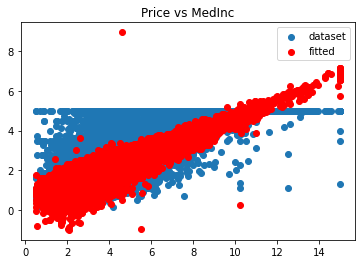

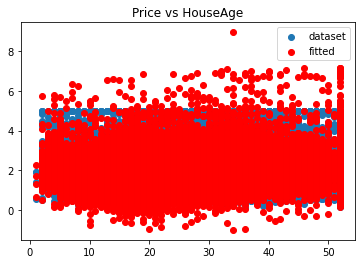

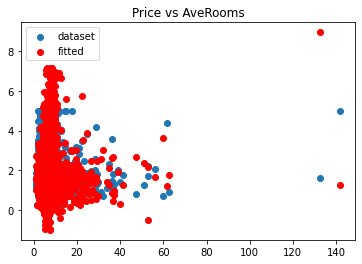

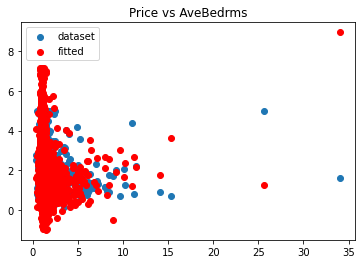

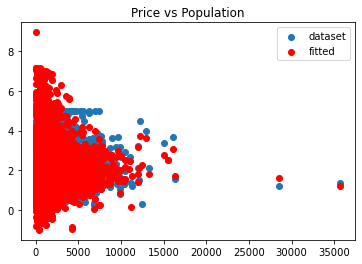

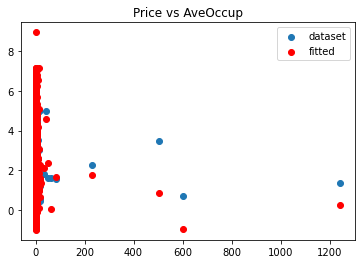

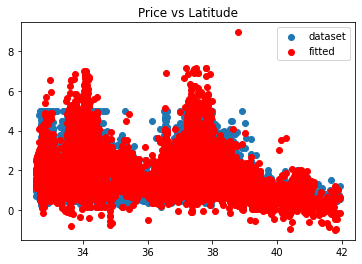

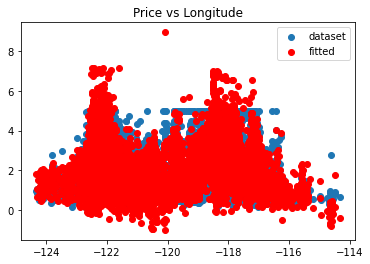

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

l_reg = LinearRegression() #loading the model

l_reg.fit(X,y) #fitting the model using our data

print("learned coefficients:", l_reg.coef_)
print("learned bias:", l_reg.intercept_)

#let's test the model
print("A house with the follwing features: ",X[0], "has a price of: ",y[0])
print("our model has predicted that a house with the follwing features: ",X[0], "has a price of: ",l_reg.predict(X[0].reshape(1,-1))[0])

#now that we got both our coeffiecient (w) and our bias (b) it's time to see how good our model has preformed
predictions = l_reg.predict(X)

print("MSE:", mean_squared_error(y, predictions))

#now to visualize it to see how close we've gotten
for i, feature_name in enumerate(california_housing.feature_names):
    plt.figure()
    plt.title(f"Price vs {feature_name}")
    plt.scatter(X[:, i], y, label='dataset')
    plt.scatter(X[:, i], predictions, label='fitted', color = "r")
    plt.legend()
    plt.show()

#### Logical Regression without the help of sklearn:

learned coefficient: ['0.4366932931421581', '0.009435778033316248', '-0.10732204139929857', '0.6450656935571801', '-3.976389421119636e-06', '-0.003786542655004691', '-0.4213143775220188', '-0.43451375466988845']
learned bias: -36.941920206810885
A house with the follwing features: ['8.3252', '41.0', '6.984126984126984', '1.0238095238095237', '322.0', '2.5555555555555554', '37.88', '-122.23', '1.0'] ] has a price of:  4.526
Our model has predicted that a house with the follwing features: ['8.3252', '41.0', '6.984126984126984', '1.0238095238095237', '322.0', '2.5555555555555554', '37.88', '-122.23', '1.0'] has a price of: 4.132
MSE: 0.5243209861846071


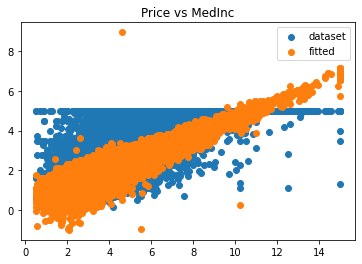

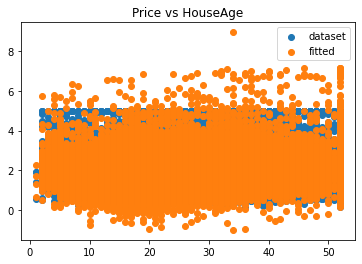

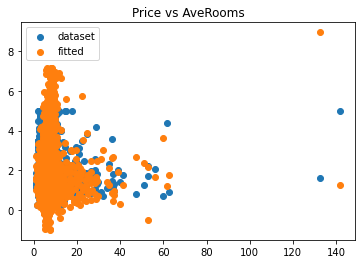

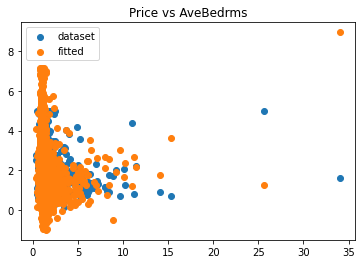

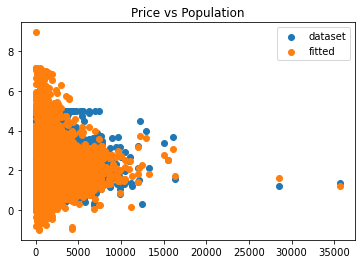

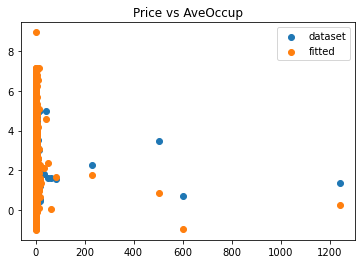

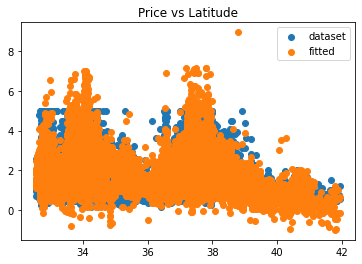

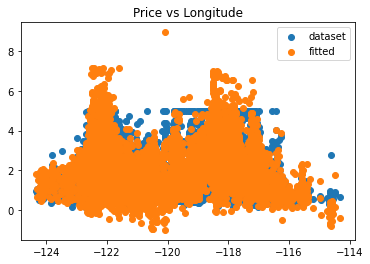

In [9]:
import numpy as np

#the first step would be reshaping our data
ones = np.ones(X.shape[0]) # create a vector of ones with the same length as the dataset
X_ = np.c_[X, ones] # concatenate the ones with the dataset

#now to use the weights equation we derived from the MSE 
weights = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X_.transpose(), X_)), X_.transpose()), y)

print(f"learned coefficient:",[str(i) for i in weights[:8]]) #changed the output into strings for a better output
print(f"learned bias:", weights[8])


#let's test the model
print("A house with the follwing features:", [str(i) for i in X_[0]], "] has a price of: ",y[0],)
print("Our model has predicted that a house with the follwing features:",[str(i)for i in X_[0]], "has a price of: {:.3f}".format(X_[0]@weights))

#rating our model
predictions = X_ @ weights
residuals = y - predictions

print("MSE:", np.mean(np.power(residuals, 2)))

#visualizing so we could see how good we did
for i, feature_name in enumerate(california_housing.feature_names):
    plt.figure()
    plt.title(f"Price vs {feature_name}")
    plt.scatter(X[:, i], y, label='dataset')
    plt.scatter(X[:, i], predictions, label='fitted')
    plt.legend()
    plt.show()

### Conclusion
As we could see from the evaluation of both methods we got pretty much the same results.